In [56]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

import folium
from folium import plugins

import functools
from itertools import product

In [6]:
#finding losa zones for each sensor 
#importing only info file
pd.options.display.max_columns = None
pod_id = pd.read_csv("20180901_20200112_PM2.5_site_info.csv")

In [10]:
pod_id = pod_id[['pod_id_location', 'Borough', 'Latitude', 'Longitude']]

In [11]:
pod_id

,pod_id_location,Borough,Latitude,Longitude
0,1245,Barnet,51.604486,-0.206551
1,2245,Camden,51.521880,-0.120434
2,3245,Camden,51.555485,-0.152338
3,5245,Wandsworth,51.440399,-0.186775
4,6245,Hounslow,51.468625,-0.359770
...,...,...,...,...
75,93245,Bromley,51.407373,0.005779
76,96245,Islington,51.528440,-0.106920
77,98245,Enfield,51.673753,-0.038301
78,332450,Westminster,51.486223,-0.145030


In [12]:
# set the filepath and load in a shapefile
fp = "/Users/oliverpaul/Data_Science/EDF/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp"
map_df = gpd.read_file(fp).to_crs({'init': 'epsg:4326'})

In [15]:
map_df = map_df[['LSOA11CD', 'LSOA11NM', 'geometry']]

In [72]:
#creating geo points from sensor location lat long data
sensors = gpd.GeoDataFrame(
    pod_id, geometry=gpd.points_from_xy(pod_id.Longitude, pod_id.Latitude))

sensors.crs = {'init' :'epsg:4326'}  

In [73]:
sensors

,pod_id_location,Borough,Latitude,Longitude,geometry
0,1245,Barnet,51.604486,-0.206551,POINT (-0.20655 51.60449)
1,2245,Camden,51.521880,-0.120434,POINT (-0.12043 51.52188)
2,3245,Camden,51.555485,-0.152338,POINT (-0.15234 51.55548)
3,5245,Wandsworth,51.440399,-0.186775,POINT (-0.18677 51.44040)
4,6245,Hounslow,51.468625,-0.359770,POINT (-0.35977 51.46863)
...,...,...,...,...,...
75,93245,Bromley,51.407373,0.005779,POINT (0.00578 51.40737)
76,96245,Islington,51.528440,-0.106920,POINT (-0.10692 51.52844)
77,98245,Enfield,51.673753,-0.038301,POINT (-0.03830 51.67375)
78,332450,Westminster,51.486223,-0.145030,POINT (-0.14503 51.48622)


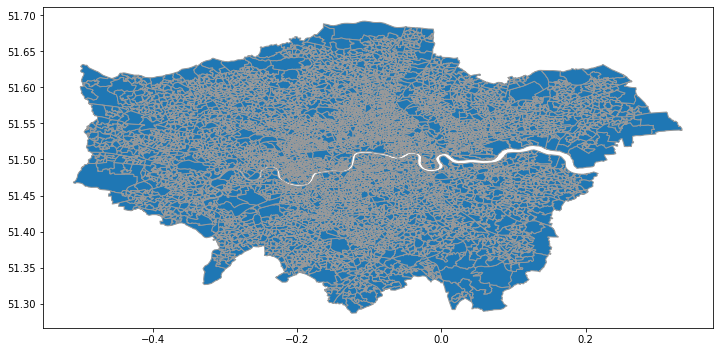

In [74]:
map_df.plot(figsize=(12, 7), edgecolor='0.6')

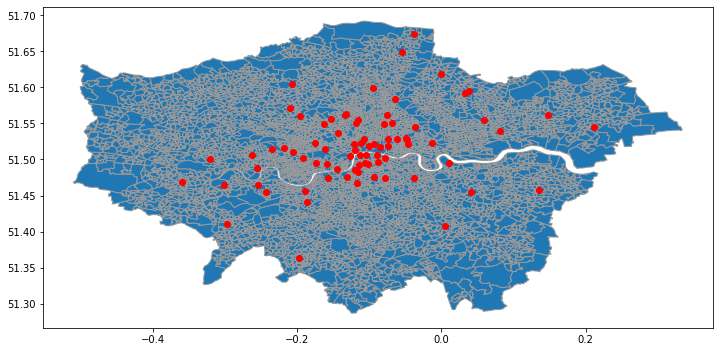

In [75]:
ax = map_df.plot(figsize=(12, 7), edgecolor='0.6')
sensors.plot(ax=ax, color='red', figsize=(12, 7))

plt.show()

In [76]:
map_df.head(5)

,LSOA11CD,LSOA11NM,geometry
0,E01000001,City of London 001A,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027..."
1,E01000002,City of London 001B,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752..."
2,E01000003,City of London 001C,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282..."
3,E01000005,City of London 001E,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974..."
4,E01000006,Barking and Dagenham 016A,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ..."


In [77]:
sensors.head(5)

,pod_id_location,Borough,Latitude,Longitude,geometry
0,1245,Barnet,51.604486,-0.206551,POINT (-0.20655 51.60449)
1,2245,Camden,51.521880,-0.120434,POINT (-0.12043 51.52188)
2,3245,Camden,51.555485,-0.152338,POINT (-0.15234 51.55548)
3,5245,Wandsworth,51.440399,-0.186775,POINT (-0.18677 51.44040)
4,6245,Hounslow,51.468625,-0.359770,POINT (-0.35977 51.46863)


In [78]:
#match = map_df['geometry'].apply(lambda x: sensors['geometry'].within(x).any())

In [93]:
merge = gpd.sjoin(map_df, sensors, how="right", op='contains')

In [94]:
merge

,index_left,LSOA11CD,LSOA11NM,pod_id_location,Borough,Latitude,Longitude,geometry
index_right,,,,,,,,
0,199,E01000204,Barnet 025C,1245,Barnet,51.604486,-0.206551,POINT (-0.20655 51.60449)
1,897,E01000915,Camden 027A,2245,Camden,51.521880,-0.120434,POINT (-0.12043 51.52188)
2,868,E01000886,Camden 006A,3245,Camden,51.555485,-0.152338,POINT (-0.15234 51.55548)
3,4385,E01004496,Wandsworth 024B,5245,Wandsworth,51.440399,-0.186775,POINT (-0.18677 51.44040)
4,4715,E01033084,Hounslow 018G,6245,Hounslow,51.468625,-0.359770,POINT (-0.35977 51.46863)
...,...,...,...,...,...,...,...,...
75,658,E01000673,Bromley 011B,93245,Bromley,51.407373,0.005779,POINT (0.00578 51.40737)
76,2665,E01002727,Islington 021C,96245,Islington,51.528440,-0.106920,POINT (-0.10692 51.52844)
77,1424,E01001446,Enfield 001B,98245,Enfield,51.673753,-0.038301,POINT (-0.03830 51.67375)


In [96]:
#saving merged spatial file to csv to then add data to pm25 csv
merge.to_csv("lsoa_pod_loc.csv")